# **Analyzing Customer Churn of a Business**

----

## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Data Preparation**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)

[**Step 3: Answering Analytical Questions**](#Step-3:-Analytical-Questions)

[**Step 4: Findings and Recommendations**](#Step-3:-Findings/Recommendations)
 



## Step 1: Business Understanding
Understanding the driving forces behind customer churn is crucial for businesses seeking to maintain customer loyalty and revenue stability. This analysis aims to delve into factors affecting churn rates and uncover patterns in customer behavior that contribute to churn, offering actionable insights to optimize customer retention efforts and enhance overall business performance. 

#### Problem Statement (REVIEW REQUIRED)
Analyzing customer churn dynamics in Company X from January 2020 to December 2021. The goal is to identify factors influencing churn rates, such as service usage patterns, customer demographics, and satisfaction metrics. By uncovering these insights, we aim to develop targeted retention strategies that can reduce churn, enhance customer loyalty, and sustain revenue growth. Additionally, examining variations in churn rates across different customer segments and time periods will inform data-driven decisions to optimize our retention efforts.

#### Objective (REVIEW REQUIRED)
The objective of this analysis is to delve into the customer churn dynamics in Company X over the period of January 2020 to December 2021:
- Identify the primary factors contributing to customer churn, including service usage patterns, demographics, and satisfaction metrics.
- Analyze variations in churn rates across different customer segments (e.g., new vs. existing customers, high-value vs. low-value customers).
- Develop predictive models to forecast churn behavior and identify at-risk customers.
- Recommend actionable strategies to mitigate churn, improve customer retention, and enhance overall customer satisfaction.
- Evaluate the effectiveness of implemented retention strategies through ongoing monitoring and analysis.

#### Analytical Questions
1. What are the primary factors affecting customer churn in the telecommunications industry? 
   - Identify and analyze key factors like service quality, pricing, customer service interactions, and the contract types that contribute to customer churn. Look for trends and patterns in these factos to understand their impact on customer retention.

2. How does the contract type affect the likelihood of customer churn?
   - Examine the relationship between the different contract types (e.g., month-to-month, one-year contracts, two-year contracts) and churn rates. Determine if certain contract types are associated with higher or lower churn. 

3. Is there a correlation between customer service interactions and churn rates?
   - Investigate whether the frequency and nature of customer service interactions (e.g., number of service requests, resolution time, satisfaction levels) correlate with customer churn rates.

4. How do demographic factors (age, income) impact customer churn rates?
   - Assess the influence of demographic factors such as age and income levels on customer churn. Determine if certain demographic segments are more likely to churn and explore potential reasons. 

5. What is the impact of monthly charges and tenure on the likelihood of a customer churning? 
   - Analyze how monthly charges and customer tenure affect churn rates. Identify pricing thresholds that lead to higher churn and understand how customer loyalty changes over time.

6. Are specific customer segments at higher risk of churning?
   - Segment the customer base to identify groups at higher risk of churning. Use clustering and predictive modeling to determine high-risk segments and their characteristics.


### Null Hypothesis (H0)
There is no significant relationship between any of the variables and customer churn behavior.

### Alternate Hypothesis (H1)
There exists at least one variable that significantly affects customer churn behavior.


## Step 2: Data Understanding

The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

### Load Data
#### Install pyodbc and python-dotenv if necessary

In [1]:
# For creating a connection
!pip install pyodbc 

# For loading environment variables
!pip install python-dotenv  

# For creating visualizations
!pip install matplotlib
!pip install seaborn

# For statistical model analysis
!pip install statsmodels

# For reading and manipulation of excel files
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Import the necessary packages

In [1]:
# Import the pyodbc library to handle ODBC database connections
import pyodbc 

# Import the dotenv function to load environment variables from a .env file
from dotenv import dotenv_values 

# Import the pandas library for data manipulation and analysis
import pandas as pd 
import numpy as np

# Import Matplotlib for  visualizations in Python
import matplotlib.pyplot as plt

# Import Seaborn for statistical data visualization based on Matplotlib
import seaborn as sns

# Import the warnings library to handle warning messages
import warnings

# Filter out (ignore) any warnings that are raised
warnings.filterwarnings('ignore')

# Import for statistical model analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Establishing a connection to the SQL database

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get('database')
server = environment_variables.get('server')
username = environment_variables.get('login')
password = environment_variables.get('password')

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

#### Load Training Dataset

In [4]:
query1 = 'Select * from dbo.LP2_Telco_churn_first_3000'
df_1 = pd.read_sql(query1, connection)
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [5]:
df_2 = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\Azubi Africa\Accelerator Projects\Customer-Churn\data\raw\telco-churn-train2-2000.csv')
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


#### Save all training data in one DataFrame

In [9]:
# Concatenate all DataFrames into one master DataFrame
train_df = pd.concat([df_1, df_2], ignore_index=True)

# Print out the new DataFrame to confirm the combination was done correctly
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### Load Test Dataset

In [7]:
test_df = pd.read_excel(r'C:\Users\ADMIN\OneDrive\Desktop\Azubi Africa\Accelerator Projects\Customer-Churn\data\raw\telco-churn-test-2000.xlsx')
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Clean the Data

In [10]:
train_df.shape

(5043, 21)

In [11]:
# Get the summary of the DataFrame (understand structure and contents of the dataset)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


#### Convert Datatypes

In [22]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
# Find unique values in the 'Location' column
unique_values = df['TotalCharges'].unique()

# Print the unique values
print(unique_values)

[  29.85000038 1889.5         108.15000153 ...  346.45        306.6
 6844.5       ]


In [15]:
# Assuming df is your DataFrame
unique_count = df['TotalCharges'].nunique()

unique_count


4863

In [13]:
null_total_charges = df[df['TotalCharges'].isnull()]
null_total_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,NaN,False
753,3115-CZMZD,Male,0,False,True,0,True,False,No,None,...,None,None,None,None,Two year,False,Mailed check,20.250000,NaN,False
936,5709-LVOEQ,Female,0,True,True,0,True,False,DSL,True,...,True,False,True,True,Two year,False,Mailed check,80.849998,NaN,False
1082,4367-NUYAO,Male,0,True,True,0,True,True,No,None,...,None,None,None,None,Two year,False,Mailed check,25.750000,NaN,False
1340,1371-DWPAZ,Female,0,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,False,Credit card (automatic),56.049999,NaN,False
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,No
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
4754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


#### Clean column values 
- True replaced with 'Yes' and all the following with 'No': False, No internet service, No phone service

In [18]:
# Define the columns to perform replacements on
columns_to_replace = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Replace True/False with Yes/No in the specified columns
train_df[columns_to_replace] = train_df[columns_to_replace].replace({True:'Yes', False:'No', 'No phone service':'No', 'No internet service':'No'})

In [19]:
# Define the specific entries you want to look up
specific_amount_entries = ['No internet service']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_amount_rows = df[df['OnlineSecurity'].isin(specific_amount_entries)]
specific_amount_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3007,7407-SUJIZ,Male,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,541.50,No
3008,9150-KPBJQ,Female,0,No,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.65,116.85,No
3012,9367-TCUYN,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.10,223.60,No
3016,4140-WJAWW,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.85,108.05,Yes
3018,6928-ONTRW,Female,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.70,1379.80,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
5019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
5020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No
5030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


#### Review Duplicates

In [13]:
# Check for duplicates
train_df.duplicated().sum()

0

#### Check Null Values

In [14]:
# Check for any '—' in the data which might represent a null value
(train_df == '—').sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
# Check for null values
train_df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges        3000
Churn                  1
dtype: int64

In [25]:
train_df['TotalCharges'] = train_df['TotalCharges'].str.strip()
train_df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges        3000
Churn                  1
dtype: int64

#### Handle Null Values

In [34]:
# Calculate the value to fill for nulls in TotalCharges
train_df['TotalCharges'] = train_df['TotalCharges'].fillna(train_df['tenure'] * train_df['MonthlyCharges'])

# Drop rows where Churn column is null
train_df.dropna(subset=['Churn'], inplace=True)

# List of columns to fill with 'No'
columns_to_fill = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace None with No in the specified columns
train_df[columns_to_replace] = train_df[columns_to_replace].replace({None:'No'})

In [36]:
# Confirm null values have all been filled
train_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Standardize Column Names

In [60]:
# Function to capitalize columns that start with a lowercase letter
def capitalize_columns(columns):
    return [col.capitalize() if col[0].islower() else col for col in columns]

# Apply the function to the column names
train_df.columns = capitalize_columns(train_df.columns)

# Display the updated column names
train_df.columns

Index(['Customerid', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [61]:
# Specifically address 'Customerid' to 'CustomerID'
train_df.columns = train_df.columns.str.replace('Customerid', 'CustomerID')
train_df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### EDA
#### Summary Statistics

In [62]:
# Summary statistics for numerical columns
train_df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,5042.000000,5042.000000,5042.000000
mean,0.162436,32.568822,65.081376
std,0.368886,24.525954,30.064564
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.762500
50%,0.000000,29.000000,70.550003
75%,0.000000,56.000000,90.050002
max,1.000000,72.000000,118.650002


#### Histogram for Numerical Variables

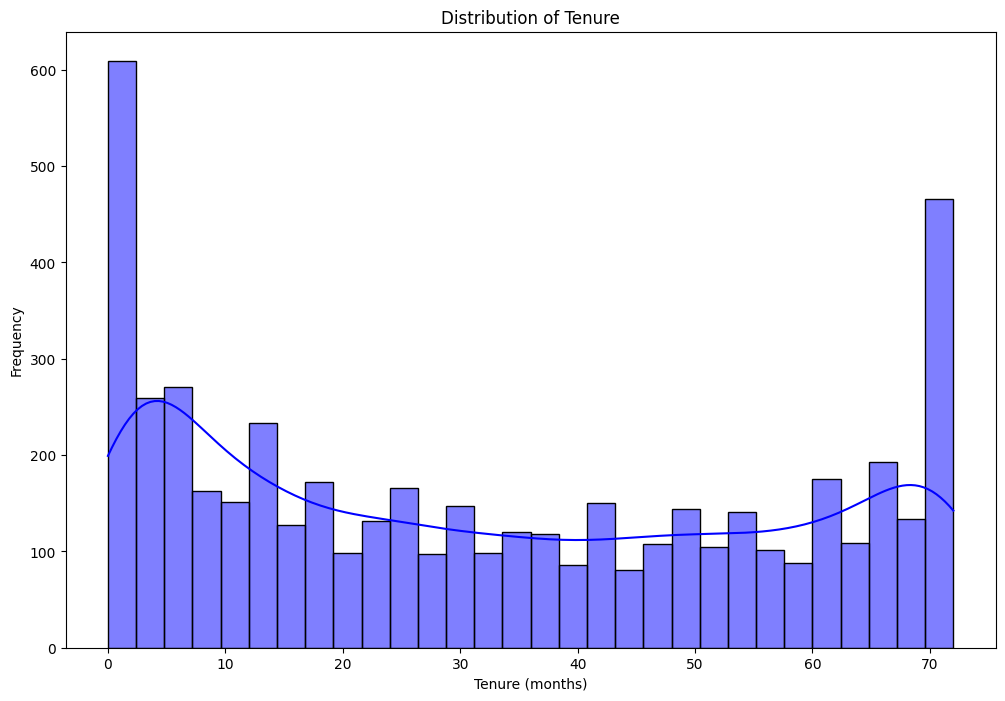

In [63]:
# Histograms for numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(train_df['Tenure'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

#### Count Plots for Categorical Variables

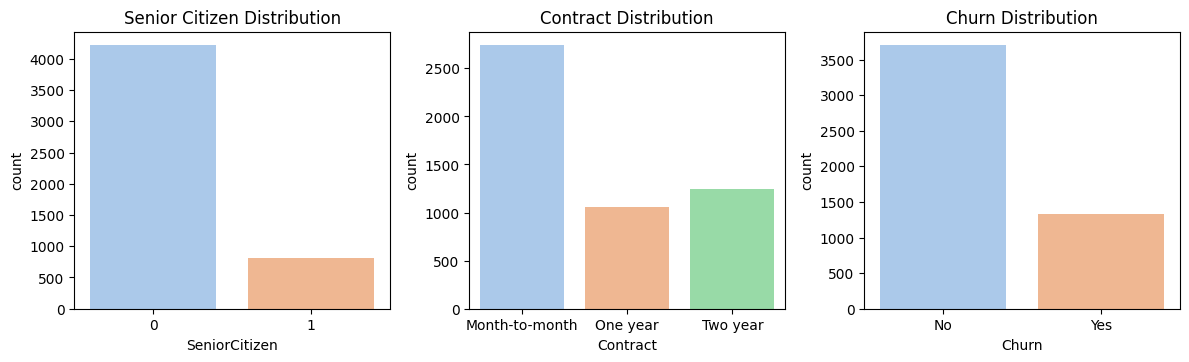

In [45]:
# Count plots for categorical variables
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
sns.countplot(x='SeniorCitizen', data=train_df, palette='pastel')
plt.title('Senior Citizen Distribution')

plt.subplot(3, 3, 2)
sns.countplot(x='Contract', data=train_df, palette='pastel')
plt.title('Contract Distribution')

plt.subplot(3, 3, 3)
sns.countplot(x='Churn', data=train_df, palette='pastel')
plt.title('Churn Distribution')

plt.tight_layout()
plt.show()

#### Correlation

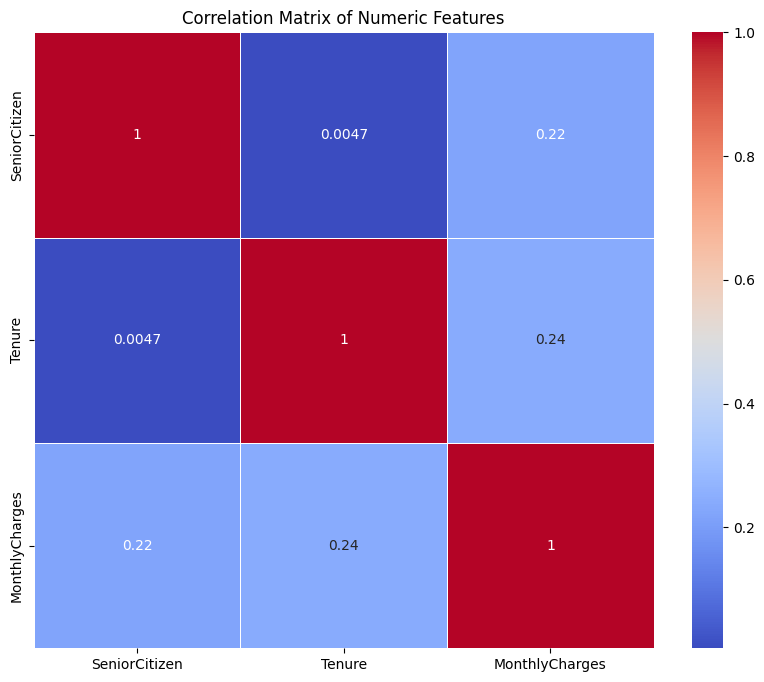

In [64]:
# Exclude non-numeric columns (e.g., customerID) for correlation matrix
numeric_columns = train_df.select_dtypes(include=['number']).columns

# Calculate correlation matrix for numeric columns
correlation_matrix = train_df[numeric_columns].corr()

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#### Outliers

- Boxplots

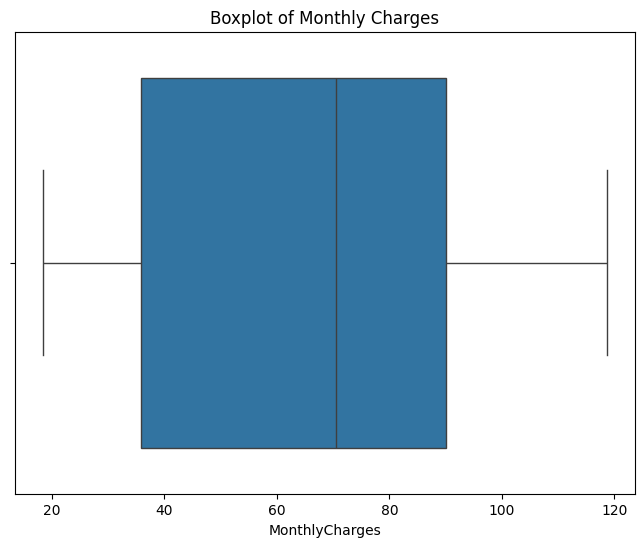

In [65]:
# Checking for outliers in 'MonthlyCharges' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.show()

In [52]:
# Calculate quartiles and IQR
Q1 = train_df['MonthlyCharges'].quantile(0.25)
Q3 = train_df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers = train_df[(train_df['MonthlyCharges'] < (Q1 - 1.5 * IQR)) | (df['MonthlyCharges'] > (Q3 + 1.5 * IQR))]

# Display number of outliers
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


- Density Plots

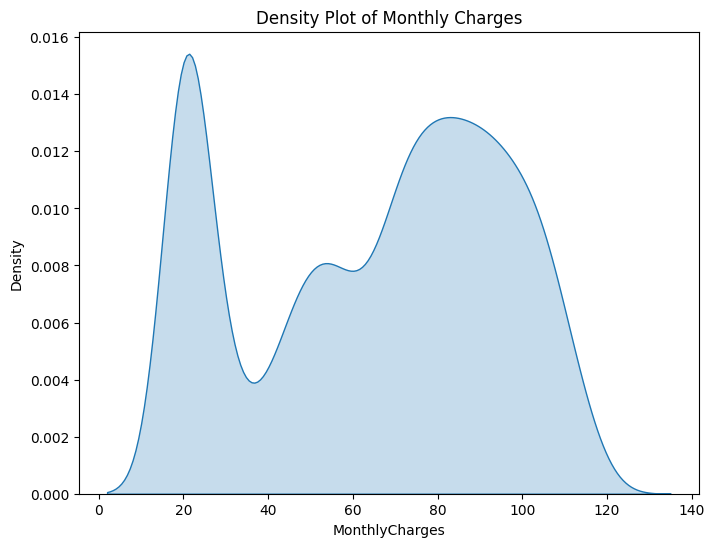

In [57]:
# Example: Density plot for 'MonthlyCharges'
plt.figure(figsize=(8, 6))
sns.kdeplot(train_df['MonthlyCharges'], shade=True)
plt.title('Density Plot of Monthly Charges')
plt.show()

In [66]:
import pandas as pd

# Assuming 'df' is your DataFrame containing your dataset
column_names = train_df.columns.tolist()

print("Column names in the dataset:")
for col in column_names:
    print(col)


Column names in the dataset:
CustomerID
Gender
SeniorCitizen
Partner
Dependents
Tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [70]:
# # Define threshold
# threshold = 0.05

# # Perform ANOVA for each factor
# factors = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
# p_values = {}

# for factor in factors:
#     # Use backticks around the factor name to handle spaces and special characters
#     formula = f'Churn ~ Q("{factor}")'
#     model = ols(formula, data = train_df).fit()
#     anova_table = sm.stats.anova_lm(model, typ = 2)
#     p_value = anova_table['PR(>F)'][0]
#     p_value_decimal = round(float(p_value),2)
#     print(f'P=value for {factor}: {p_value_decimal}')

#     p_values[factor] = p_value_decimal

# # Compare p_values
# significant_factors = [factor for factor, p_value in p_values.items() if p_value < threshold]
# print('Significant factors with p_values below {}: {}'.format(threshold, significant_factors))